# **Predicting Diabetes using Machine Learning**

**Business Problem**: One of the fields where Artificial Intelligence will have a huge positive impact in the future is Medical Science. Doctors and researchers have been trying to use Machine Learning to learn the occurrence of cancers and use the different protein combinations in the DNA as the data to predict the diseases long before it will occur to the person. In the future, we might be able to know our chance of getting a cancer a decade or 2 before that can help us avoid it.

Fortunately, in my search of finding a good medical science dataset, I came across this **“Pima Indians Diabetes Database”** on Kaggle. It is collected from the National Institute of Diabetes and Digestive and Kidney Disease. This dataset is small with 9 features and 768 observations which is enough to solve the problem of predicting the probability of a person to be a Diabetic.

Here’s a brief description of all the features which I’m referring from data source itself for you to follow along.

1: **Pregnancies: Number of times pregnant**

2: **Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.**

3: **BloodPressure: Diastolic blood pressure (mm Hg)**

4: **SkinThickness: Triceps skin fold thickness (mm)**

5: **Insulin: 2-Hour serum insulin (mu U/ml)**

6: **BMI: Body mass index (weight in kg/(height in m)²)**

7: **DiabetesPedigreeFunction: Diabetes pedigree function**

8: **Age: Age (years)**

9: **Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0**

All the variables are either self-known or available in a simple Blood Test and “Outcome” is what we need to predict. 

We will explore different features and perform various pre-processing techniques before trying out different machine learning algorithms like logistic Regression, Support Vector Machines, Decision FOrest, Gradient Boosting and finally we wil also explore neural networks. Once we have the best model, we will pickle the model and use that to develop a Flask app to predict diabetes and then deploy it using Heroku. **Let's begin.** 

In [ ]:
#importing reqd libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


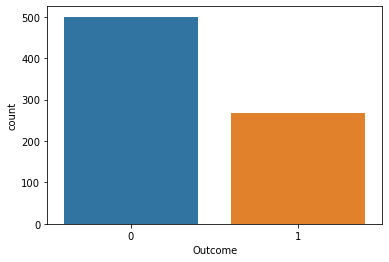

In [140]:
ax = sns.countplot(x="Outcome", data=df)

In [141]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


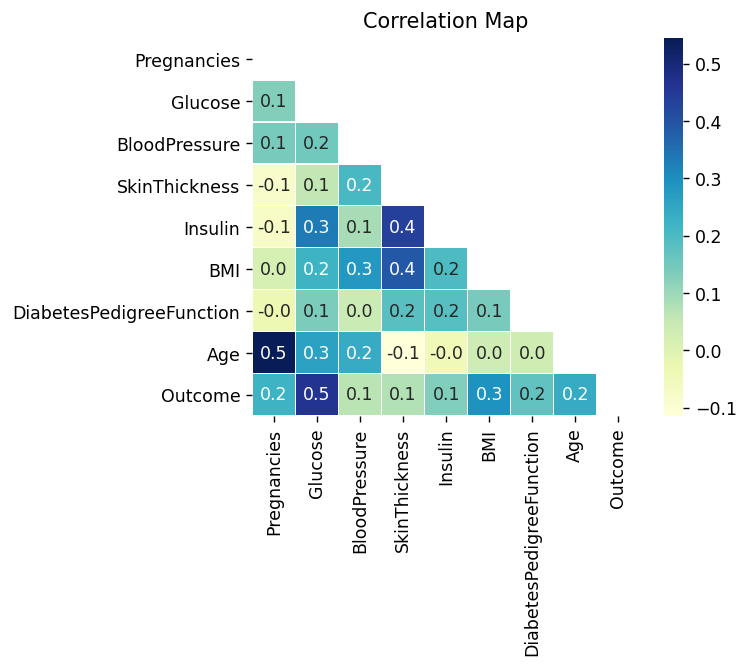

In [9]:
#correlation map without any preprocessing

plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

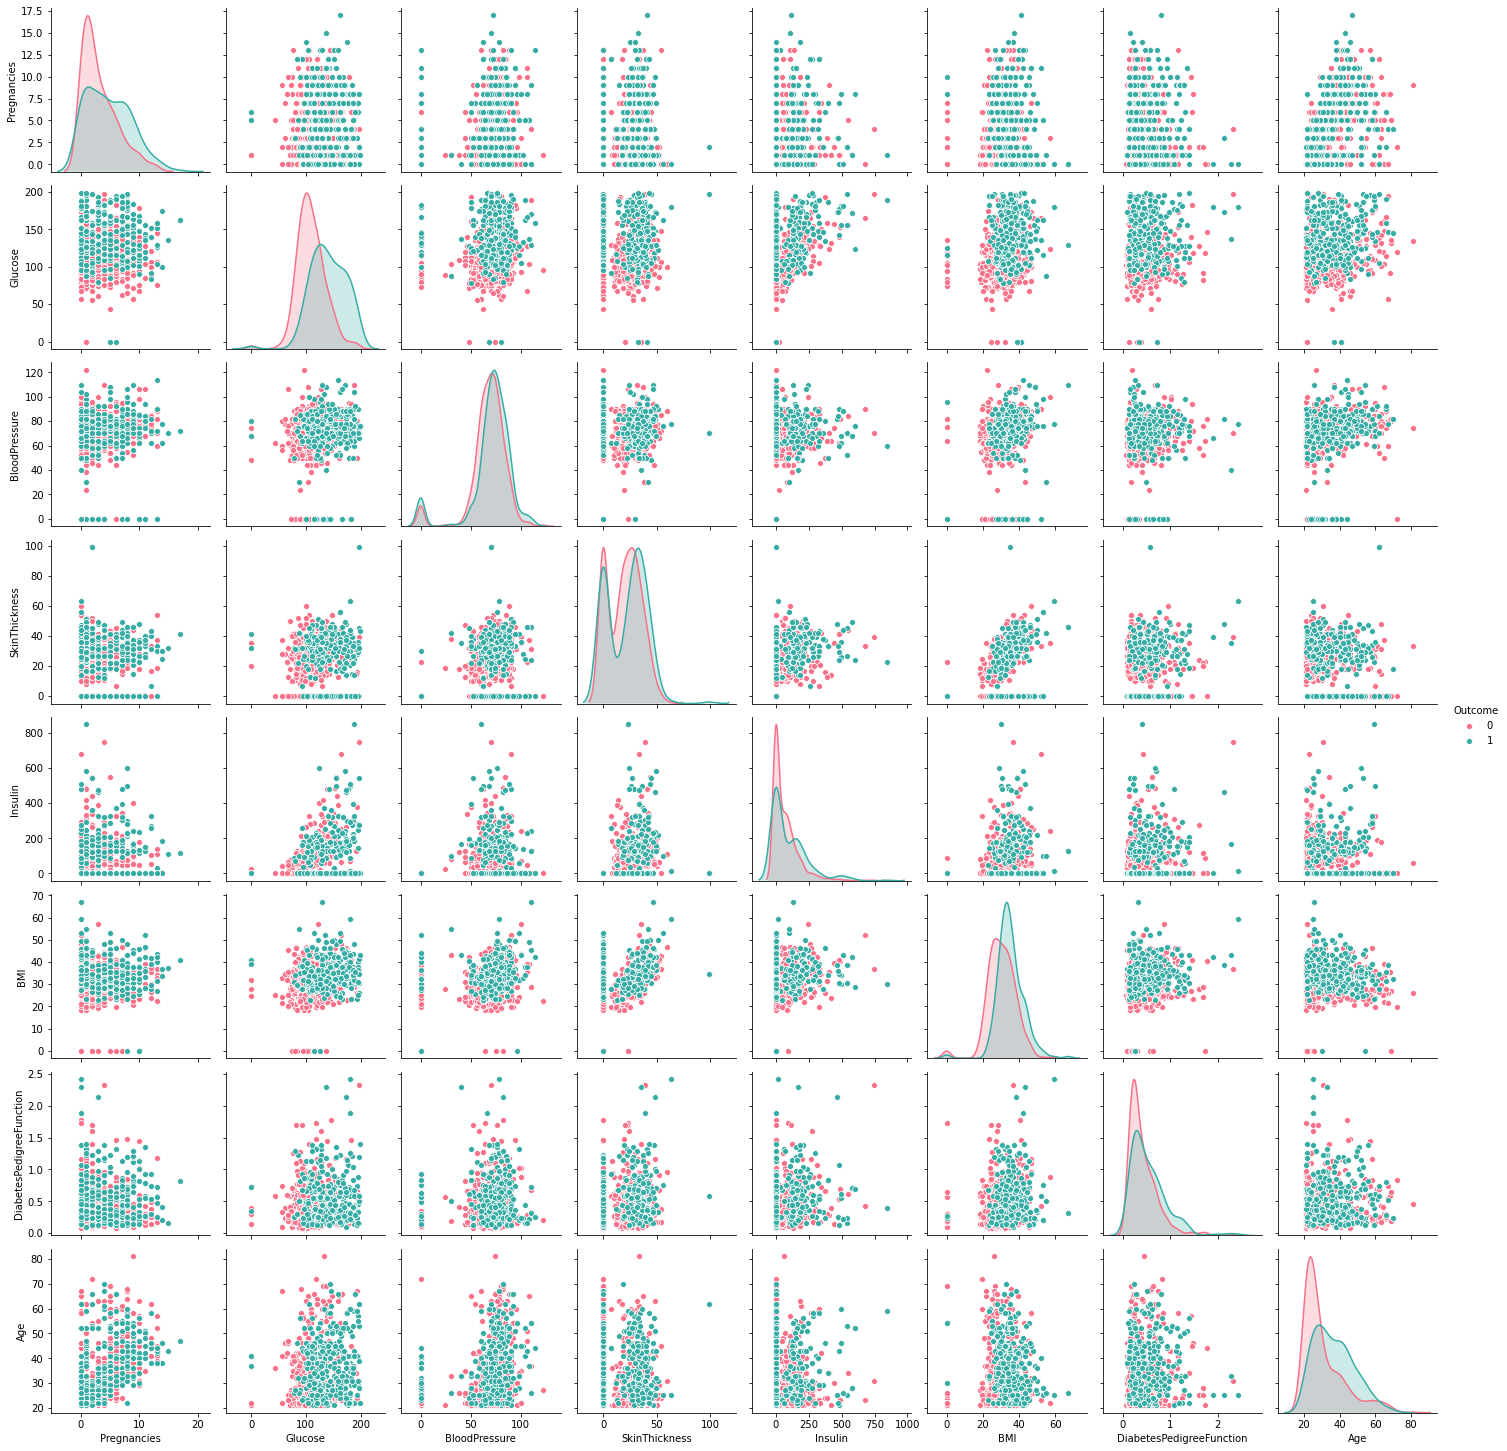

In [10]:
sns.pairplot(df, hue="Outcome", palette="husl")

In [11]:
print('Total zero Glucose values: ' + str(df[df['Glucose']==0].shape[0]))
print('Total zero BloodPressure values: ' + str(df[df['BloodPressure']==0].shape[0]))
print('Total zero SkinThickness values: ' + str(df[df['SkinThickness']==0].shape[0]))
print('Total zero Insulin values: ' + str(df[df['Insulin']==0].shape[0]))
print('Total zero BMI values: ' + str(df[df['BMI']==0].shape[0]))
print('Total zero DiabetesPedigreeFunction values: ' + str(df[df['DiabetesPedigreeFunction']==0].shape[0]))
print('Total zero Age values: ' + str(df[df['Age']==0].shape[0]))

Total zero Glucose values: 5
Total zero BloodPressure values: 35
Total zero SkinThickness values: 227
Total zero Insulin values: 374
Total zero BMI values: 11
Total zero DiabetesPedigreeFunction values: 0
Total zero Age values: 0


In [12]:
df[df['Glucose']==0]['Outcome'].value_counts()

0    3
1    2
Name: Outcome, dtype: int64

In [13]:
df[df['BloodPressure']==0]['Outcome'].value_counts()

0    19
1    16
Name: Outcome, dtype: int64

In [14]:
df[df['SkinThickness']==0]['Outcome'].value_counts()

0    139
1     88
Name: Outcome, dtype: int64

In [15]:
df[df['Insulin']==0]['Outcome'].value_counts()

0    236
1    138
Name: Outcome, dtype: int64

In [16]:
df[df['BMI']==0]['Outcome'].value_counts()

0    9
1    2
Name: Outcome, dtype: int64

In [17]:
def replace_zero(df):
    df_nan = df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan

df_nan=replace_zero(df)

In [18]:
df_nan.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0


In [19]:
df_nan[df_nan['Glucose'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [20]:
#finds the median of different attribute based on Outcome
def find_median(df, col):
    
    df_nondiab = df[df['Outcome']==0].reset_index(drop = True)
    df_diab = df[df['Outcome']==1].reset_index(drop = True)
    return(df_nondiab[col].median(), df_diab[col].median())


In [21]:
find_median(df_nan,'Glucose')

(107.0, 140.0)

In [22]:
df_nan.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
def replace_null(df,var):
    
    median_tuple=find_median(df,var)
    var_0 = median_tuple[0]
    var_1 = median_tuple[1]
    
    df.loc[(df['Outcome'] == 0) & (df[var].isnull()), var] = var_0
    df.loc[(df['Outcome'] == 1) & (df[var].isnull()), var] = var_1
        
    return df[var].isnull().sum()

In [24]:
replace_null(df_nan, 'Glucose' )

0

In [25]:
replace_null(df_nan, 'BloodPressure' )

0

In [26]:
replace_null(df_nan, 'SkinThickness' )

0

In [27]:
replace_null(df_nan, 'Insulin' )

0

In [28]:
replace_null(df_nan, 'BMI' )

0

In [29]:
df_nan.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

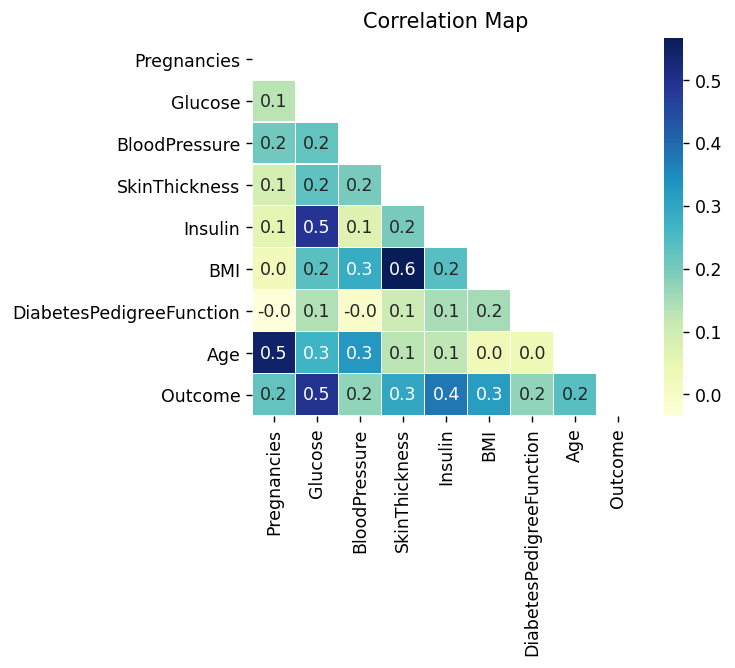

In [30]:
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df_nan.corr())
sns.heatmap(df_nan.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

In [31]:
df_nan.shape

(768, 9)

In [32]:
df.shape

(768, 9)

In [33]:
df = df_nan.copy()

In [34]:
column_list = list(df.columns)

In [35]:
column_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [36]:
df.shape

(768, 9)

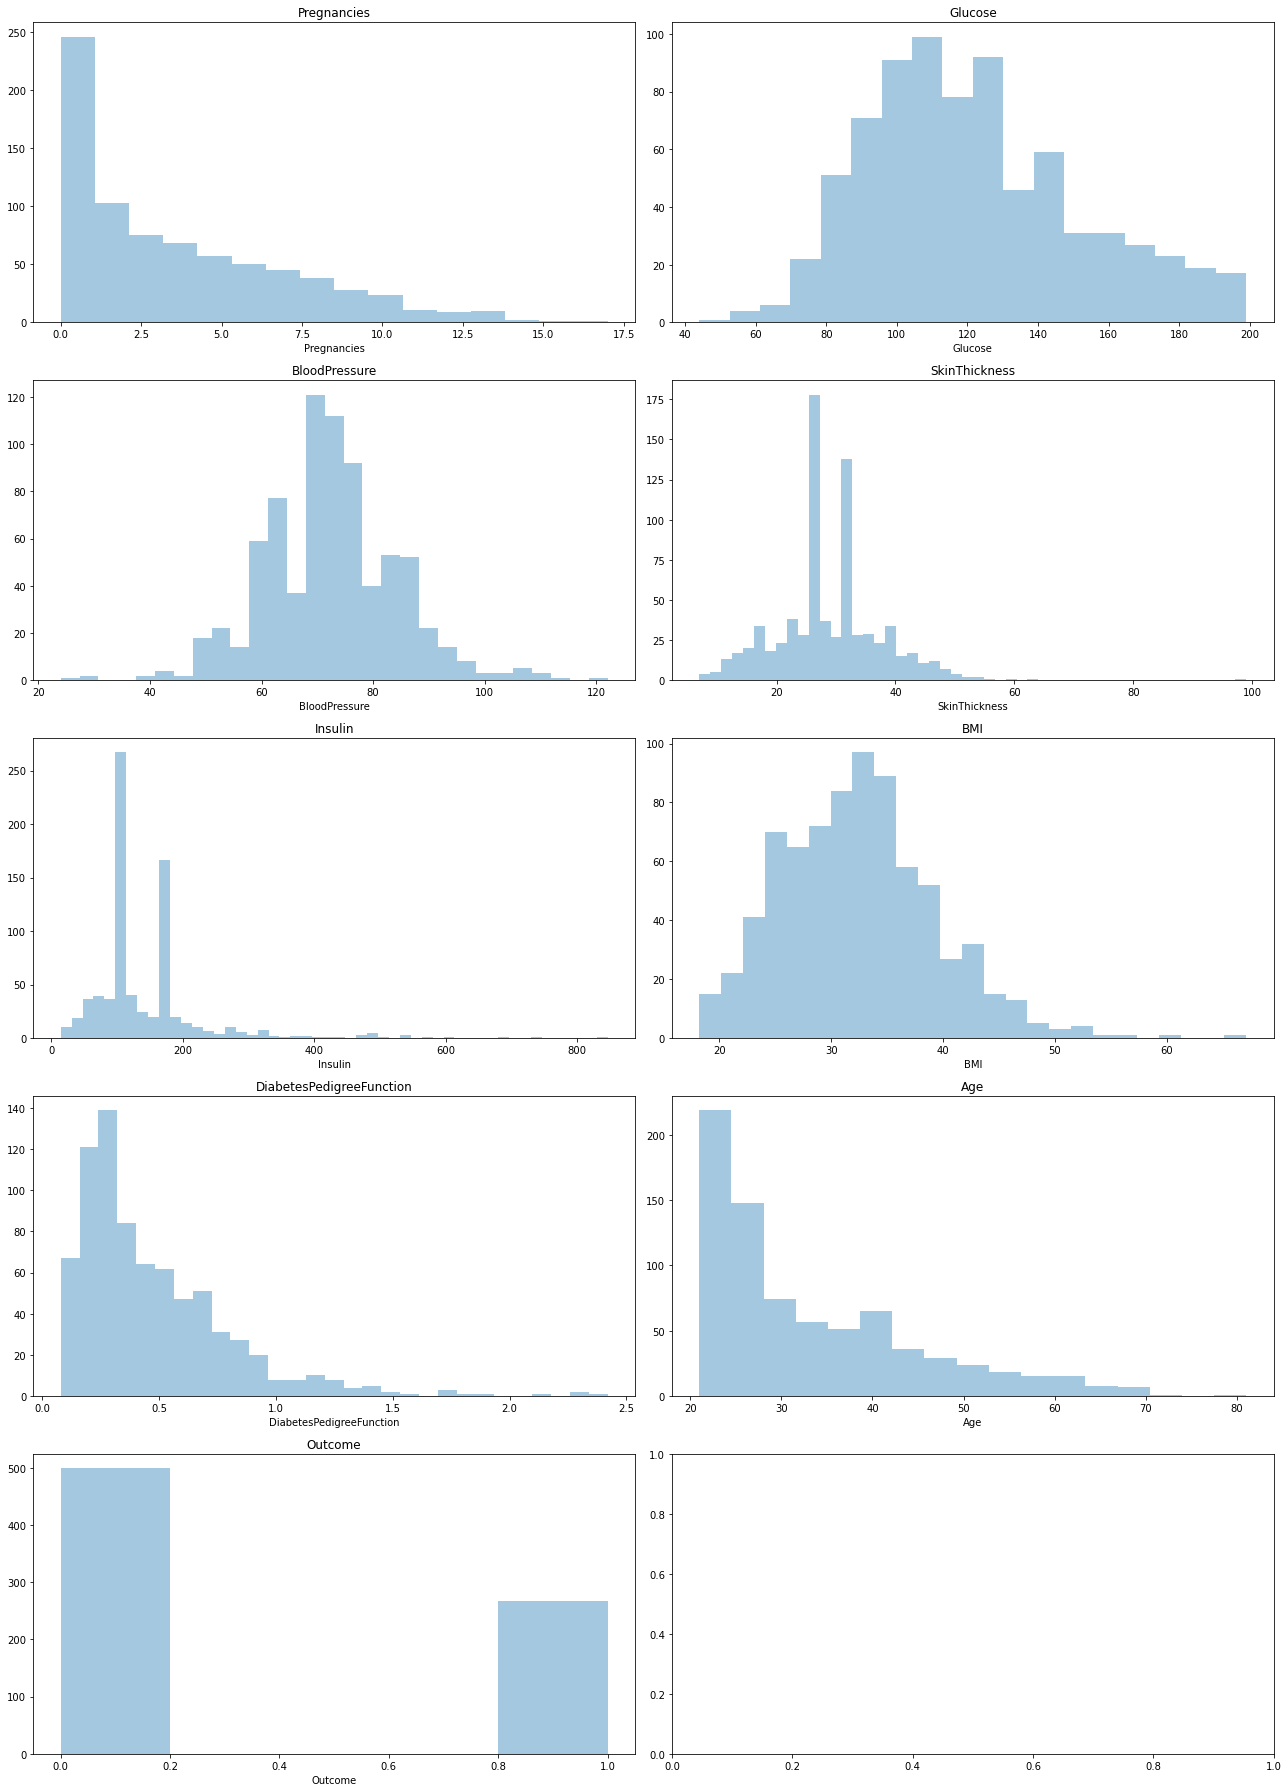

In [37]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(18, 25))

for i, subplot in zip(range(9), ax.flatten()):
    
    sns.distplot(df[column_list[i]], hist=True, ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()
    
plt.show()

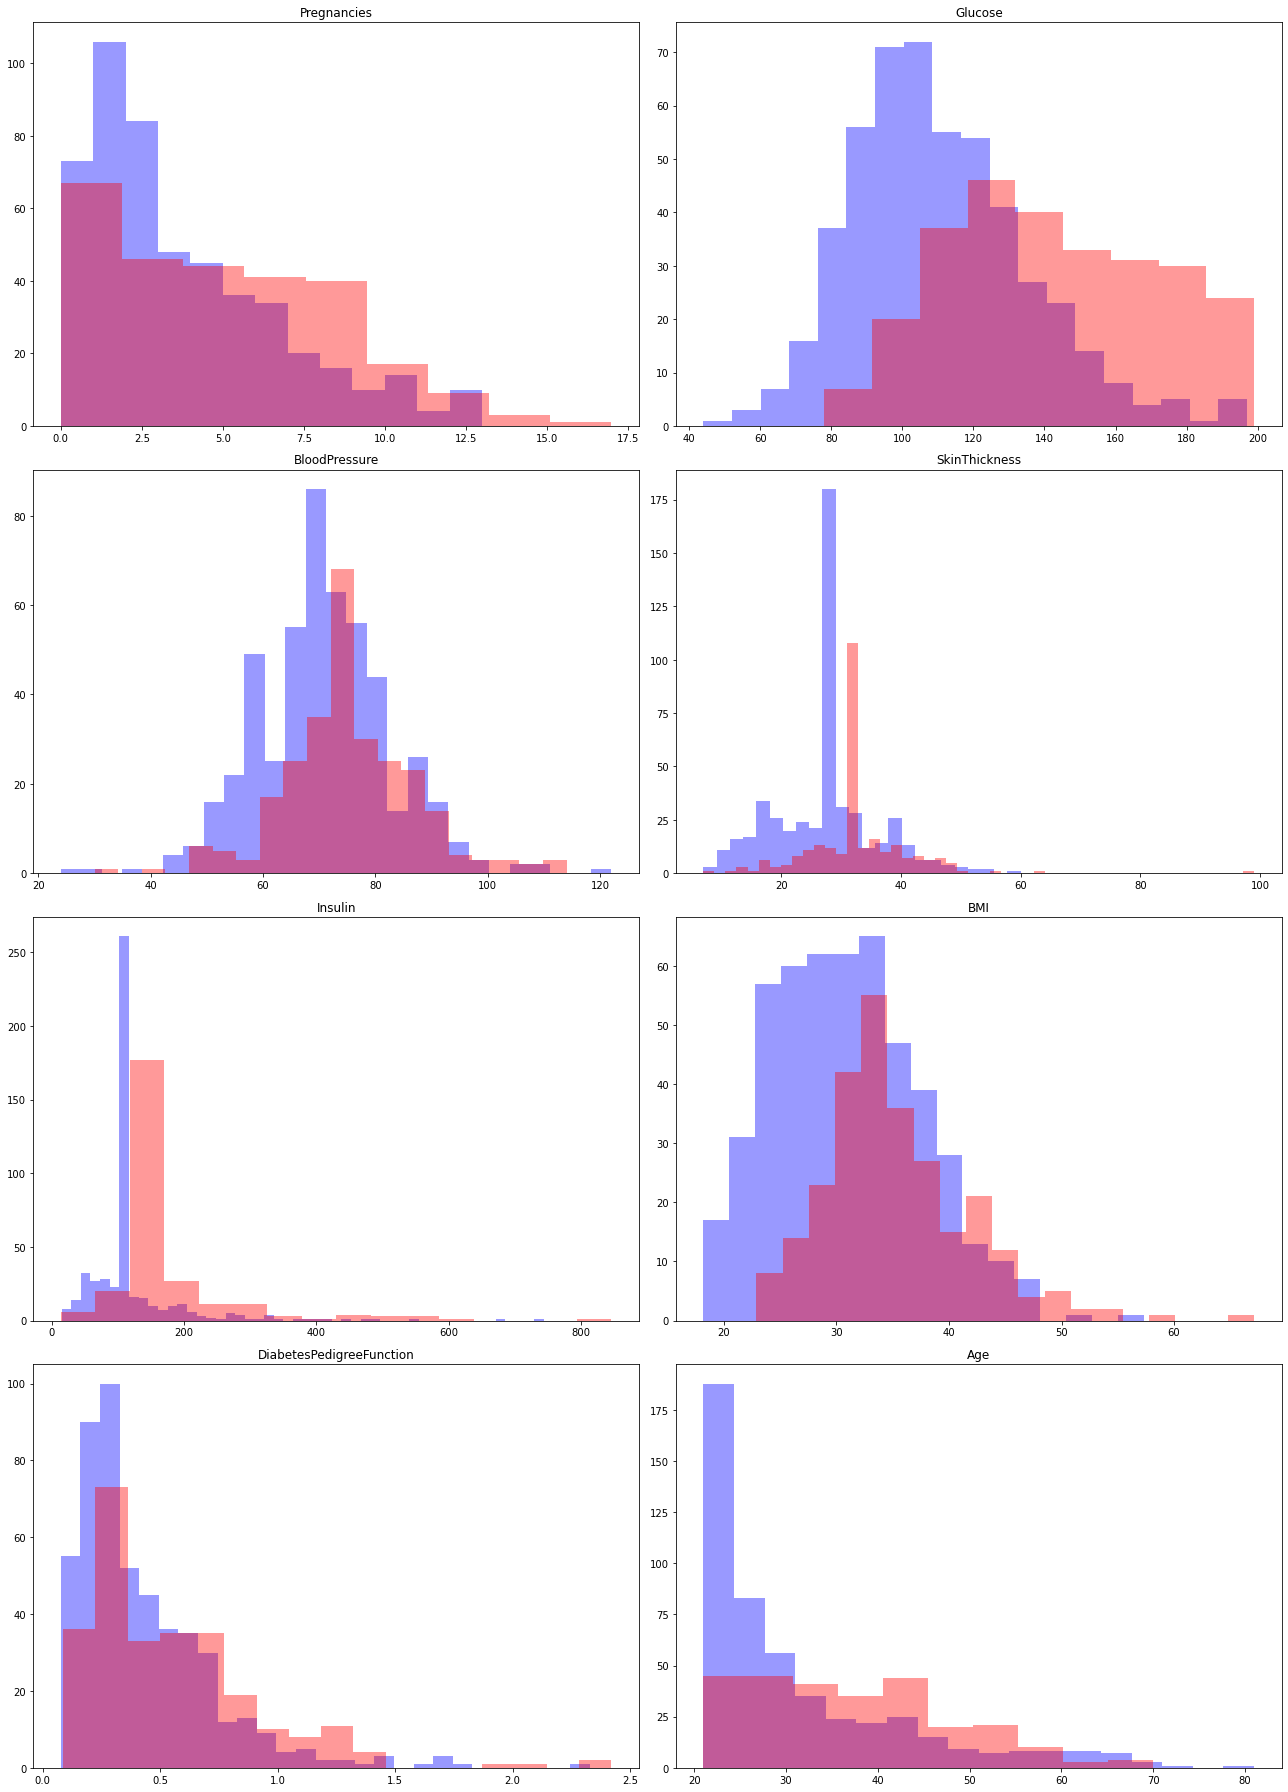

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(18, 25))

target_0 = df.loc[df['Outcome'] == 0]
target_1 = df.loc[df['Outcome'] == 1]

for i, subplot in zip(range(8), ax.flatten()):
    
    sns.distplot(target_0[[column_list[i]]], hist=True, color = 'blue', ax=subplot, norm_hist = False, kde = False)
    sns.distplot(target_1[[column_list[i]]], hist=True, color = 'red', ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()

plt.show()
    

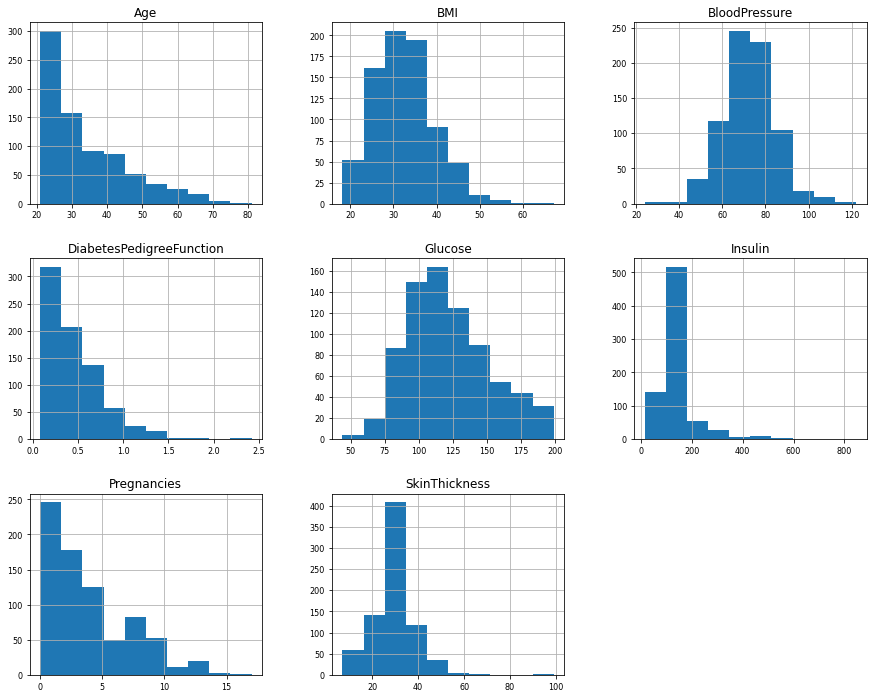

In [39]:
#visualizing numeric data

df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].hist(figsize=(15, 12), bins=10, xlabelsize=8, ylabelsize=8);

In [40]:
df.shape

(768, 9)

In [41]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0


Text(0, 0.5, 'No of Pregnancies')

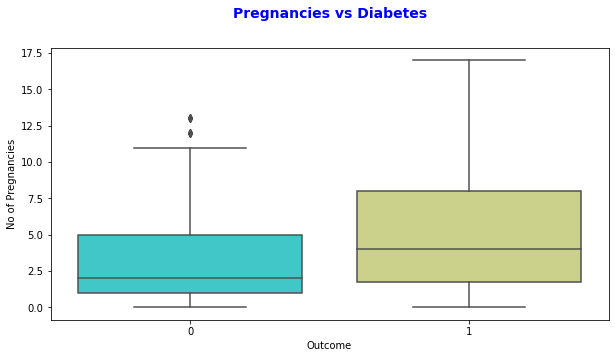

In [42]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Pregnancies",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Pregnancies vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('No of Pregnancies', fontsize = 10)

Text(0, 0.5, 'Glucose Amount')

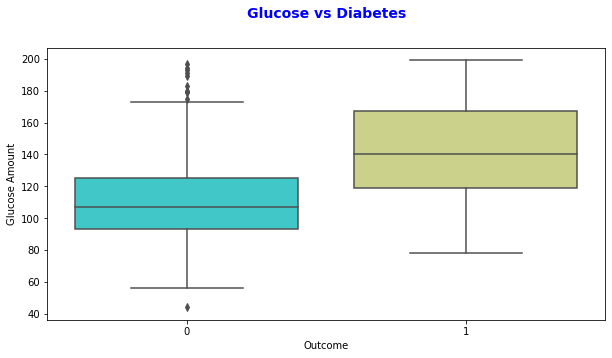

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Glucose",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Glucose vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Glucose Amount', fontsize = 10)

Text(0, 0.5, 'BloodPressure')

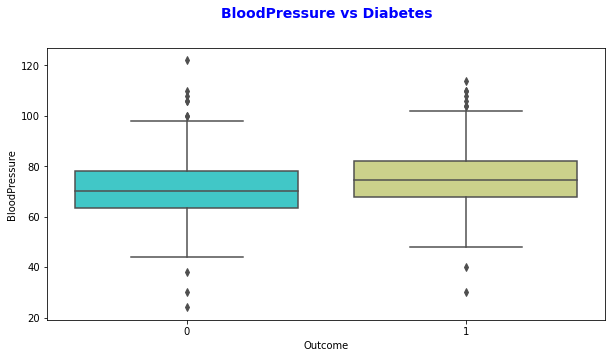

In [44]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="BloodPressure",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='BloodPressure vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('BloodPressure', fontsize = 10)

Text(0, 0.5, 'SkinThickness')

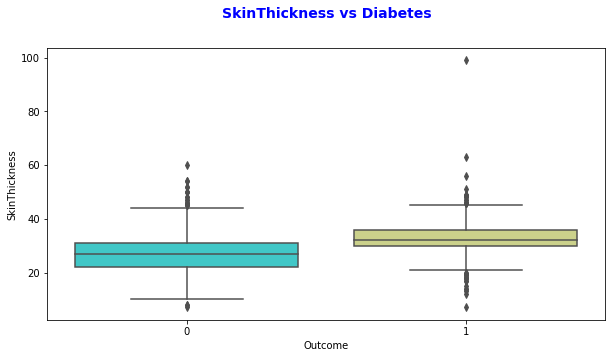

In [45]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="SkinThickness",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='SkinThickness vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('SkinThickness', fontsize = 10)

Text(0, 0.5, 'Insulin')

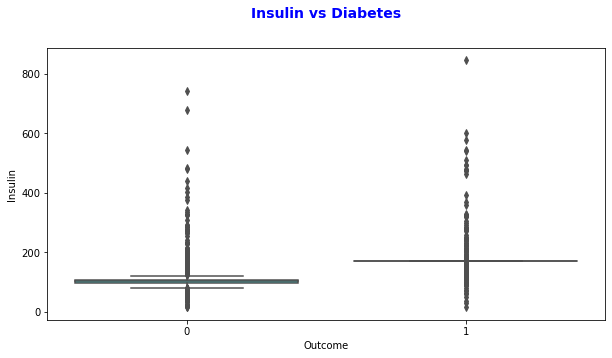

In [139]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Insulin",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Insulin vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Insulin', fontsize = 10)

Text(0, 0.5, 'BMI')

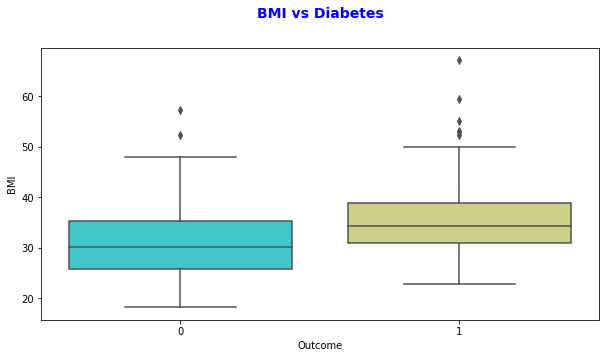

In [47]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="BMI",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='BMI vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('BMI', fontsize = 10)

Text(0, 0.5, 'DiabetesPedigreeFunction')

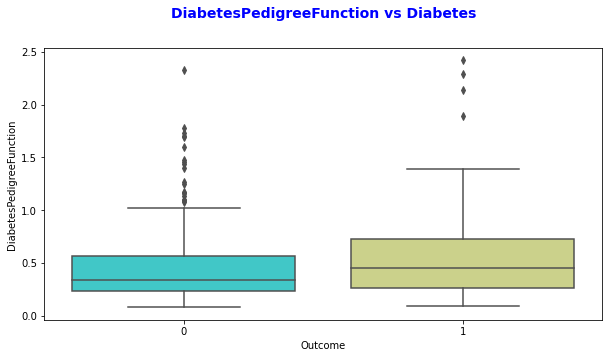

In [48]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='DiabetesPedigreeFunction vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('DiabetesPedigreeFunction', fontsize = 10)

Text(0, 0.5, 'Age')

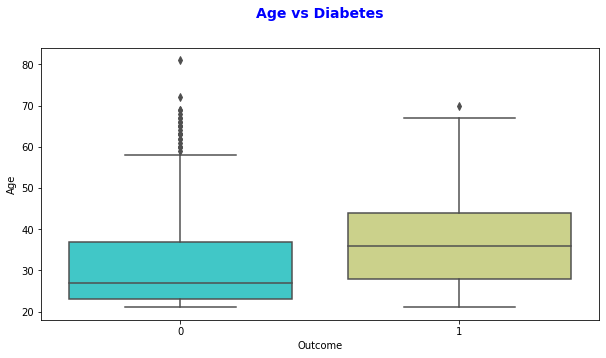

In [49]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Age",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Age vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Age', fontsize = 10)

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix, accuracy_score

In [51]:
pca_x = df.copy()
pca_x = pca_x.drop(columns = "Outcome")

In [52]:
scaler = StandardScaler()
pca_x = pd.DataFrame(scaler.fit_transform(pca_x))

In [53]:
pca_x

,0,1,2,3,4,5,6,7
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679177,0.298449,2.128317,0.429525,0.067679,-0.908682,2.532136
764,-0.547919,0.010607,-0.197495,-0.235210,-0.440843,0.634868,-0.398282,-0.531023
765,0.342981,-0.022240,-0.032180,-0.685405,-0.334153,-0.906722,-0.685193,-0.275760
766,-0.844885,0.141994,-1.024067,0.327535,0.311604,-0.339533,-0.371101,1.170732


In [54]:
pca_x.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


In [55]:
pca_df = pd.DataFrame(df['Outcome'])

In [56]:
#visualizing using PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_x)
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 

In [57]:
pca_df

,Outcome,pca-one,pca-two
0,1,1.575769,-0.613465
1,0,-1.575930,0.079637
2,1,0.734548,-0.543459
3,0,-2.131111,0.267265
4,1,0.804709,3.506736
...,...,...,...
763,0,2.129022,-2.017483
764,0,-0.469797,0.607274
765,0,-0.894597,-0.837066
766,1,-0.070977,-0.004374


In [58]:
pca_df.columns = ['Diabetic outcome','pca-one', 'pca-two']
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29817668 0.18752573]


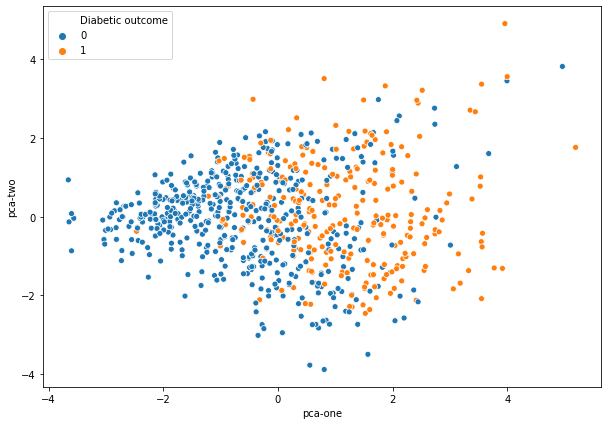

In [59]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="pca-one", y="pca-two",hue='Diabetic outcome', data=pca_df)

In [60]:
df_tsne = df.copy()

In [61]:
df_tsne.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [62]:
y = df_tsne['Outcome']
df_tsne = df_tsne.drop(columns = 'Outcome')

In [63]:
df_tsne.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [64]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(df_tsne)

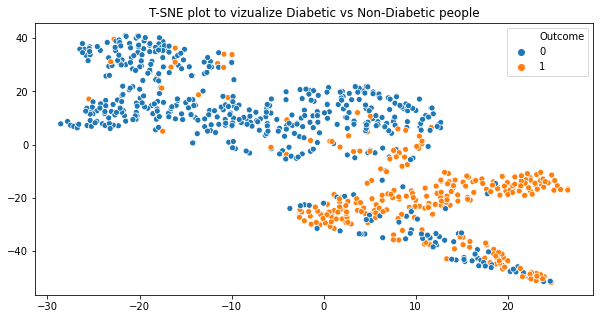

In [65]:
plt.figure(figsize=(10, 5))
plt.title('T-SNE plot to vizualize Diabetic vs Non-Diabetic people')
sns.scatterplot(x = tsne_features[:,0], y = tsne_features[:,1], hue = y)
plt.show()

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [67]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [68]:
data = df.copy()

In [69]:
Y = data.Outcome
X = data.drop("Outcome", axis = 1)

In [70]:
columns = X.columns


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train)

#save
import pickle
pickle.dump(std, open('std.pkl','wb'))


X_train = std.transform(X_train)
X_test = std.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.531978,-0.706880,-0.186385,2.489469,-0.956673,1.157236,0.631014,-0.693698
1,0.057083,-0.113681,-0.186385,-0.237913,-0.454062,1.742852,1.334750,-0.608986
2,1.824269,-0.673925,0.318498,2.053088,0.402033,0.044565,-0.937667,2.525347
3,-0.826509,-0.838703,-0.691267,-0.237913,-0.625281,0.088486,-0.571848,-1.032545
4,1.235207,-0.871658,-0.018090,-0.237913,-0.454062,0.615541,0.035783,2.017077


In [73]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.121040,-0.245503,0.655087,0.525754,1.561903,1.698931,-0.950067,-0.524274
1,-0.531978,-0.311414,1.159969,1.398516,0.181105,0.849787,-0.705155,-0.439563
2,0.057083,0.018142,-0.354679,-0.237913,-0.454062,0.352014,-0.246331,-0.354851
3,-0.826509,-0.805747,-0.186385,-1.547056,-0.454062,-2.107575,-1.012071,-1.032545
4,1.824269,1.336364,0.991675,-0.237913,-0.454062,-0.716736,-0.903565,1.762942
...,...,...,...,...,...,...,...,...
149,0.351614,0.347697,0.655087,-0.237913,-0.454062,-0.848500,-0.891164,3.033618
150,0.940676,-0.080725,-0.186385,-0.237913,-0.454062,-1.082746,-0.819861,0.322843
151,0.351614,-1.102347,-0.522973,-0.892485,-1.332250,-1.199869,-0.407540,-0.270139
152,-0.237448,0.215875,-0.018090,-0.456104,0.512497,-0.028637,0.234193,-0.524274


In [74]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with standardized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with standardized features: 0.83


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [76]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm = norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.361290,0.469388,0.489130,0.051683,0.456033,0.255764,0.066667
1,0.235294,0.477419,0.469388,0.217391,0.106370,0.537832,0.352690,0.083333
2,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
3,0.058824,0.335484,0.408163,0.217391,0.087740,0.306748,0.090094,0.000000
4,0.470588,0.329032,0.489796,0.217391,0.106370,0.380368,0.173783,0.600000


In [77]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.451613,0.571429,0.293478,0.325721,0.531697,0.038002,0.100000
1,0.117647,0.438710,0.632653,0.380435,0.175481,0.413088,0.071734,0.116667
2,0.235294,0.503226,0.448980,0.217391,0.106370,0.343558,0.134927,0.133333
3,0.058824,0.341935,0.469388,0.086957,0.106370,0.000000,0.029462,0.000000
4,0.588235,0.761290,0.612245,0.217391,0.106370,0.194274,0.044406,0.550000


In [78]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with normalized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with normalized features: 0.82


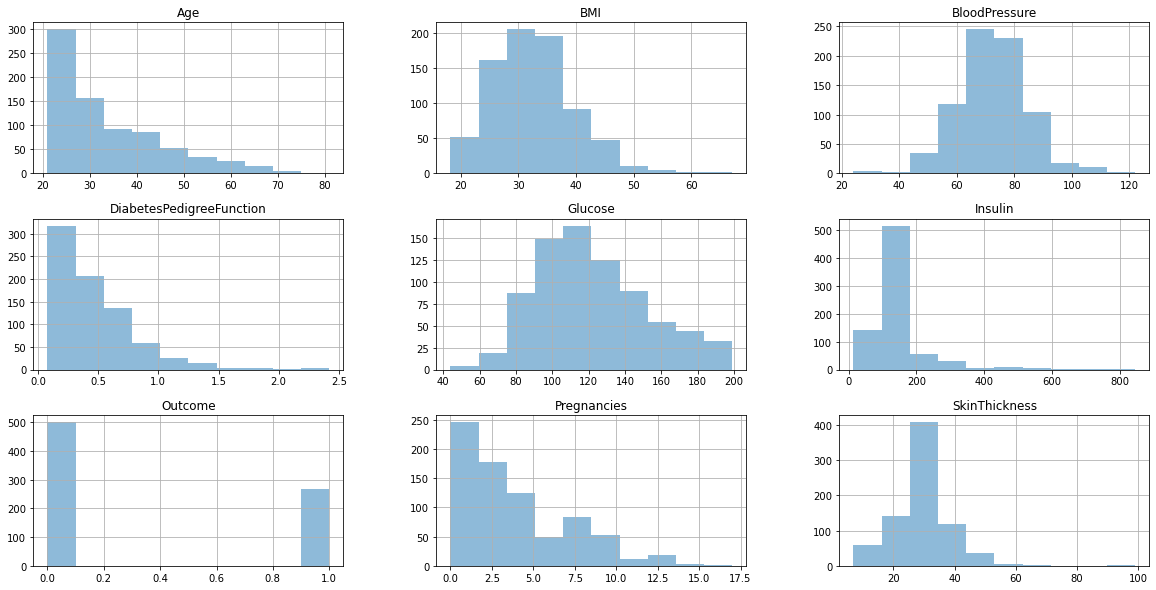

In [79]:
# Plotting the histograms of each variable
from matplotlib import pyplot
data.hist(alpha=0.5, figsize=(20, 10))
pyplot.show()

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [81]:
type(X_train)

pandas.core.frame.DataFrame

In [82]:
X_train_std = X_train[['BMI','BloodPressure', 'Glucose']]
X_test_std = X_test[['BMI','BloodPressure', 'Glucose']]

In [83]:
X_train_norm = X_train[['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']]
X_test_norm = X_test[['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']]

In [84]:
X_train_std.head()

,BMI,BloodPressure,Glucose
275,40.5,70.0,100.0
699,44.5,70.0,118.0
763,32.9,76.0,101.0
208,33.2,64.0,96.0
344,36.8,72.0,95.0


In [85]:
colums_std = ['BMI','BloodPressure', 'Glucose']
columns_norm = ['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train_std)
X_train_std = std.transform(X_train_std)
X_test_std = std.transform(X_test_std)
X_train_std = pd.DataFrame(X_train_std, columns = colums_std)
X_test_std = pd.DataFrame(X_test_std, columns = colums_std)
X_train_std.head()

,BMI,BloodPressure,Glucose
0,1.157236,-0.186385,-0.706880
1,1.742852,-0.186385,-0.113681
2,0.044565,0.318498,-0.673925
3,0.088486,-0.691267,-0.838703
4,0.615541,-0.018090,-0.871658


In [87]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm = norm.fit(X_train_norm)
X_train_norm = norm.transform(X_train_norm)
X_test_norm = norm.transform(X_test_norm)
X_train_norm = pd.DataFrame(X_train_norm, columns = columns_norm)
X_test_norm = pd.DataFrame(X_test_norm, columns = columns_norm)
X_train_norm.head()

,Age,DiabetesPedigreeFunction,Insulin,Pregnancies,SkinThickness
0,0.066667,0.255764,0.051683,0.117647,0.489130
1,0.083333,0.352690,0.106370,0.235294,0.217391
2,0.700000,0.039710,0.199519,0.588235,0.445652
3,0.000000,0.090094,0.087740,0.058824,0.217391
4,0.600000,0.173783,0.106370,0.470588,0.217391


In [88]:
X_train = pd.concat([X_train_std, X_train_norm], axis=1)
X_test = pd.concat([X_test_std, X_test_norm], axis=1)

In [89]:
X_train.head(2)

,BMI,BloodPressure,Glucose,Age,DiabetesPedigreeFunction,Insulin,Pregnancies,SkinThickness
0,1.157236,-0.186385,-0.706880,0.066667,0.255764,0.051683,0.117647,0.489130
1,1.742852,-0.186385,-0.113681,0.083333,0.352690,0.106370,0.235294,0.217391


In [90]:
X_test

,BMI,BloodPressure,Glucose,Age,DiabetesPedigreeFunction,Insulin,Pregnancies,SkinThickness
0,1.698931,0.655087,-0.245503,0.100000,0.038002,0.325721,0.000000,0.293478
1,0.849787,1.159969,-0.311414,0.116667,0.071734,0.175481,0.117647,0.380435
2,0.352014,-0.354679,0.018142,0.133333,0.134927,0.106370,0.235294,0.217391
3,-2.107575,-0.186385,-0.805747,0.000000,0.029462,0.106370,0.058824,0.086957
4,-0.716736,0.991675,1.336364,0.550000,0.044406,0.106370,0.588235,0.217391
...,...,...,...,...,...,...,...,...
149,-0.848500,0.655087,0.347697,0.800000,0.046114,0.106370,0.294118,0.217391
150,-1.082746,-0.186385,-0.080725,0.266667,0.055935,0.106370,0.411765,0.217391
151,-1.199869,-0.522973,-1.102347,0.150000,0.112724,0.010817,0.294118,0.152174
152,-0.028637,-0.018090,0.215875,0.100000,0.201110,0.211538,0.176471,0.195652


In [91]:
y_test

162    0
620    0
233    0
438    0
660    0
      ..
123    0
222    0
52     0
541    1
439    0
Name: Outcome, Length: 154, dtype: int64

In [92]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with normalized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with normalized features: 0.82


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.531978,-0.706880,-0.186385,2.489469,-0.956673,1.157236,0.631014,-0.693698
1,0.057083,-0.113681,-0.186385,-0.237913,-0.454062,1.742852,1.334750,-0.608986
2,1.824269,-0.673925,0.318498,2.053088,0.402033,0.044565,-0.937667,2.525347
3,-0.826509,-0.838703,-0.691267,-0.237913,-0.625281,0.088486,-0.571848,-1.032545
4,1.235207,-0.871658,-0.018090,-0.237913,-0.454062,0.615541,0.035783,2.017077


In [95]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with standardized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with standardized features: 0.83


In [96]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(5,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_scores.append(neigh.score(X_train,y_train))
    test_scores.append(neigh.score(X_test,y_test))

In [97]:
print('Max train_scores is ' + str(max(train_scores)*100) + ' for k = '+ 
      str(train_scores.index(max(train_scores))+5))

Max train_scores is 85.50488599348535 for k = 11


In [98]:
print('Max test_scores is ' + str(max(test_scores)*100) + ' for k = '+ 
      str(test_scores.index(max(test_scores))+5))
# K=13 has generalized well for our data.

Max test_scores is 87.01298701298701 for k = 13


In [134]:
#Support Vector Machines
from sklearn import svm
svm_model = svm.SVC(probability=True).fit(X_train, y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, y_test)
# Almost 89% Accuracy

0.8831168831168831

In [100]:
X_train.shape

(614, 8)

In [101]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state = 20)

# use a full grid over all parameters
param_grid = {'n_estimators' : [50,100,150], "max_depth": [3, 5, 7],
              "max_features": [1, 3, 5, 7, 8]
              }

# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')

grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))

Grid-Search with accuracy
Best parameters: {'max_depth': 7, 'max_features': 3, 'n_estimators': 100}
Best cross-validation score (accuracy)): 0.880


In [102]:
from sklearn.metrics import accuracy_score

In [103]:
rfc = RandomForestClassifier(n_estimators= 100, max_features= 3, max_depth= 7)
rfc.fit(X_train, y_train)

y_pr=rfc.predict(X_test)
print("Test set accuracy: {:.3f}".format(accuracy_score(y_test, y_pr)))

confusion_matrix(y_test, y_pr)

Test set accuracy: 0.890


array([[91,  9],
       [ 8, 46]], dtype=int64)

In [104]:
clf = GradientBoostingClassifier(random_state=20)
# use a full grid over all parameters
param_grid = {'n_estimators' : [50,100,150], "max_depth": [2,5,7,8],
              "max_features": [2,3,5, 7] ,'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
              }
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))

Grid-Search with accuracy
Best parameters: {'learning_rate': 0.075, 'max_depth': 5, 'max_features': 2, 'n_estimators': 50}
Best cross-validation score (accuracy)): 0.888


In [105]:
gbc = GradientBoostingClassifier(n_estimators= 50, max_features= 2, max_depth= 5, learning_rate= 0.075)
gbc.fit(X_train, y_train)

y_pr=gbc.predict(X_test)
print("Test set accuracy: {:.3f}".format(accuracy_score(y_test, y_pr)))

confusion_matrix(y_test, y_pr)

Test set accuracy: 0.877


array([[90, 10],
       [ 9, 45]], dtype=int64)

In [106]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [107]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: protobuf>=3.9.2 in c:\users\saket.garodia\anaconda3\lib\site-packages (from tensorflow) (3.13.0)



In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [109]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(X_train.keys())]),
    #tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),

    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()

In [110]:
neural_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [111]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [112]:
checkpoint_name = 'Weights\Weights-{epoch:03d}--{val_accuracy:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = False, mode ='auto')
callbacks_list = [checkpoint]

In [113]:
# Keeping EPOCHs high as dataset is small.
EPOCHS = 1000
neural_pred = neural_model.fit(X_train, y_train,epochs=EPOCHS, validation_split=0.15, verbose=2, callbacks = callbacks_list )

Epoch 1/1000
17/17 - 2s - loss: 0.9950 - accuracy: 0.3666 - val_loss: 0.7979 - val_accuracy: 0.3763

Epoch 00001: saving model to Weights\Weights-001--0.37634.hdf5
Epoch 2/1000
17/17 - 0s - loss: 0.6968 - accuracy: 0.5893 - val_loss: 0.6539 - val_accuracy: 0.7097

Epoch 00002: saving model to Weights\Weights-002--0.70968.hdf5
Epoch 3/1000
17/17 - 0s - loss: 0.6473 - accuracy: 0.7159 - val_loss: 0.6156 - val_accuracy: 0.7849

Epoch 00003: saving model to Weights\Weights-003--0.78495.hdf5
Epoch 4/1000
17/17 - 0s - loss: 0.6217 - accuracy: 0.7332 - val_loss: 0.5738 - val_accuracy: 0.8172

Epoch 00004: saving model to Weights\Weights-004--0.81720.hdf5
Epoch 5/1000
17/17 - 0s - loss: 0.5825 - accuracy: 0.7370 - val_loss: 0.5144 - val_accuracy: 0.8280

Epoch 00005: saving model to Weights\Weights-005--0.82796.hdf5
Epoch 6/1000
17/17 - 0s - loss: 0.5334 - accuracy: 0.7390 - val_loss: 0.4479 - val_accuracy: 0.7957

Epoch 00006: saving model to Weights\Weights-006--0.79570.hdf5
Epoch 7/1000
17/

Epoch 51/1000
17/17 - 0s - loss: 0.2832 - accuracy: 0.8829 - val_loss: 0.2276 - val_accuracy: 0.8925

Epoch 00051: saving model to Weights\Weights-051--0.89247.hdf5
Epoch 52/1000
17/17 - 0s - loss: 0.2863 - accuracy: 0.8829 - val_loss: 0.2286 - val_accuracy: 0.8925

Epoch 00052: saving model to Weights\Weights-052--0.89247.hdf5
Epoch 53/1000
17/17 - 0s - loss: 0.2833 - accuracy: 0.8810 - val_loss: 0.2248 - val_accuracy: 0.9032

Epoch 00053: saving model to Weights\Weights-053--0.90323.hdf5
Epoch 54/1000
17/17 - 0s - loss: 0.2807 - accuracy: 0.8791 - val_loss: 0.2367 - val_accuracy: 0.8925

Epoch 00054: saving model to Weights\Weights-054--0.89247.hdf5
Epoch 55/1000
17/17 - 0s - loss: 0.2810 - accuracy: 0.8887 - val_loss: 0.2286 - val_accuracy: 0.8925

Epoch 00055: saving model to Weights\Weights-055--0.89247.hdf5
Epoch 56/1000
17/17 - 0s - loss: 0.2840 - accuracy: 0.8848 - val_loss: 0.2337 - val_accuracy: 0.8925

Epoch 00056: saving model to Weights\Weights-056--0.89247.hdf5
Epoch 57/1


Epoch 00101: saving model to Weights\Weights-101--0.87097.hdf5
Epoch 102/1000
17/17 - 0s - loss: 0.2329 - accuracy: 0.9021 - val_loss: 0.3112 - val_accuracy: 0.8710

Epoch 00102: saving model to Weights\Weights-102--0.87097.hdf5
Epoch 103/1000
17/17 - 0s - loss: 0.2296 - accuracy: 0.9040 - val_loss: 0.3125 - val_accuracy: 0.8602

Epoch 00103: saving model to Weights\Weights-103--0.86022.hdf5
Epoch 104/1000
17/17 - 0s - loss: 0.2308 - accuracy: 0.9060 - val_loss: 0.3264 - val_accuracy: 0.8710

Epoch 00104: saving model to Weights\Weights-104--0.87097.hdf5
Epoch 105/1000
17/17 - 0s - loss: 0.2303 - accuracy: 0.9021 - val_loss: 0.3086 - val_accuracy: 0.8710

Epoch 00105: saving model to Weights\Weights-105--0.87097.hdf5
Epoch 106/1000
17/17 - 0s - loss: 0.2460 - accuracy: 0.9002 - val_loss: 0.3285 - val_accuracy: 0.8602

Epoch 00106: saving model to Weights\Weights-106--0.86022.hdf5
Epoch 107/1000
17/17 - 0s - loss: 0.2345 - accuracy: 0.9002 - val_loss: 0.3114 - val_accuracy: 0.8495

Epo

17/17 - 0s - loss: 0.2063 - accuracy: 0.9175 - val_loss: 0.3448 - val_accuracy: 0.8817

Epoch 00151: saving model to Weights\Weights-151--0.88172.hdf5
Epoch 152/1000
17/17 - 0s - loss: 0.2091 - accuracy: 0.9194 - val_loss: 0.3875 - val_accuracy: 0.8495

Epoch 00152: saving model to Weights\Weights-152--0.84946.hdf5
Epoch 153/1000
17/17 - 0s - loss: 0.2074 - accuracy: 0.9175 - val_loss: 0.3431 - val_accuracy: 0.8817

Epoch 00153: saving model to Weights\Weights-153--0.88172.hdf5
Epoch 154/1000
17/17 - 0s - loss: 0.2117 - accuracy: 0.9117 - val_loss: 0.3917 - val_accuracy: 0.8495

Epoch 00154: saving model to Weights\Weights-154--0.84946.hdf5
Epoch 155/1000
17/17 - 0s - loss: 0.2072 - accuracy: 0.9155 - val_loss: 0.3512 - val_accuracy: 0.8817

Epoch 00155: saving model to Weights\Weights-155--0.88172.hdf5
Epoch 156/1000
17/17 - 0s - loss: 0.2132 - accuracy: 0.9175 - val_loss: 0.3857 - val_accuracy: 0.8602

Epoch 00156: saving model to Weights\Weights-156--0.86022.hdf5
Epoch 157/1000
17/1


Epoch 00200: saving model to Weights\Weights-200--0.83871.hdf5
Epoch 201/1000
17/17 - 0s - loss: 0.2085 - accuracy: 0.9194 - val_loss: 0.3784 - val_accuracy: 0.8710

Epoch 00201: saving model to Weights\Weights-201--0.87097.hdf5
Epoch 202/1000
17/17 - 0s - loss: 0.2002 - accuracy: 0.9175 - val_loss: 0.3932 - val_accuracy: 0.8710

Epoch 00202: saving model to Weights\Weights-202--0.87097.hdf5
Epoch 203/1000
17/17 - 0s - loss: 0.1978 - accuracy: 0.9290 - val_loss: 0.3951 - val_accuracy: 0.8602

Epoch 00203: saving model to Weights\Weights-203--0.86022.hdf5
Epoch 204/1000
17/17 - 0s - loss: 0.1963 - accuracy: 0.9155 - val_loss: 0.4291 - val_accuracy: 0.8387

Epoch 00204: saving model to Weights\Weights-204--0.83871.hdf5
Epoch 205/1000
17/17 - 0s - loss: 0.2012 - accuracy: 0.9232 - val_loss: 0.3907 - val_accuracy: 0.8710

Epoch 00205: saving model to Weights\Weights-205--0.87097.hdf5
Epoch 206/1000
17/17 - 0s - loss: 0.2012 - accuracy: 0.9194 - val_loss: 0.3914 - val_accuracy: 0.8710

Epo

17/17 - 0s - loss: 0.1916 - accuracy: 0.9232 - val_loss: 0.4395 - val_accuracy: 0.8280

Epoch 00250: saving model to Weights\Weights-250--0.82796.hdf5
Epoch 251/1000
17/17 - 0s - loss: 0.1910 - accuracy: 0.9251 - val_loss: 0.4164 - val_accuracy: 0.8495

Epoch 00251: saving model to Weights\Weights-251--0.84946.hdf5
Epoch 252/1000
17/17 - 0s - loss: 0.1887 - accuracy: 0.9232 - val_loss: 0.4319 - val_accuracy: 0.8387

Epoch 00252: saving model to Weights\Weights-252--0.83871.hdf5
Epoch 253/1000
17/17 - 0s - loss: 0.1901 - accuracy: 0.9271 - val_loss: 0.4568 - val_accuracy: 0.8280

Epoch 00253: saving model to Weights\Weights-253--0.82796.hdf5
Epoch 254/1000
17/17 - 0s - loss: 0.1903 - accuracy: 0.9309 - val_loss: 0.4131 - val_accuracy: 0.8495

Epoch 00254: saving model to Weights\Weights-254--0.84946.hdf5
Epoch 255/1000
17/17 - 0s - loss: 0.1918 - accuracy: 0.9213 - val_loss: 0.4435 - val_accuracy: 0.8387

Epoch 00255: saving model to Weights\Weights-255--0.83871.hdf5
Epoch 256/1000
17/1


Epoch 00299: saving model to Weights\Weights-299--0.81720.hdf5
Epoch 300/1000
17/17 - 0s - loss: 0.1884 - accuracy: 0.9232 - val_loss: 0.4842 - val_accuracy: 0.8280

Epoch 00300: saving model to Weights\Weights-300--0.82796.hdf5
Epoch 301/1000
17/17 - 0s - loss: 0.1889 - accuracy: 0.9194 - val_loss: 0.4177 - val_accuracy: 0.8387

Epoch 00301: saving model to Weights\Weights-301--0.83871.hdf5
Epoch 302/1000
17/17 - 0s - loss: 0.1818 - accuracy: 0.9290 - val_loss: 0.4525 - val_accuracy: 0.8280

Epoch 00302: saving model to Weights\Weights-302--0.82796.hdf5
Epoch 303/1000
17/17 - 0s - loss: 0.1807 - accuracy: 0.9347 - val_loss: 0.4430 - val_accuracy: 0.8280

Epoch 00303: saving model to Weights\Weights-303--0.82796.hdf5
Epoch 304/1000
17/17 - 0s - loss: 0.1779 - accuracy: 0.9271 - val_loss: 0.4698 - val_accuracy: 0.8280

Epoch 00304: saving model to Weights\Weights-304--0.82796.hdf5
Epoch 305/1000
17/17 - 0s - loss: 0.1923 - accuracy: 0.9271 - val_loss: 0.4464 - val_accuracy: 0.8172

Epo

17/17 - 0s - loss: 0.1688 - accuracy: 0.9367 - val_loss: 0.5082 - val_accuracy: 0.8280

Epoch 00349: saving model to Weights\Weights-349--0.82796.hdf5
Epoch 350/1000
17/17 - 0s - loss: 0.1715 - accuracy: 0.9405 - val_loss: 0.4845 - val_accuracy: 0.8387

Epoch 00350: saving model to Weights\Weights-350--0.83871.hdf5
Epoch 351/1000
17/17 - 0s - loss: 0.1683 - accuracy: 0.9386 - val_loss: 0.5000 - val_accuracy: 0.8172

Epoch 00351: saving model to Weights\Weights-351--0.81720.hdf5
Epoch 352/1000
17/17 - 0s - loss: 0.1752 - accuracy: 0.9405 - val_loss: 0.4801 - val_accuracy: 0.8280

Epoch 00352: saving model to Weights\Weights-352--0.82796.hdf5
Epoch 353/1000
17/17 - 0s - loss: 0.1749 - accuracy: 0.9367 - val_loss: 0.4872 - val_accuracy: 0.8495

Epoch 00353: saving model to Weights\Weights-353--0.84946.hdf5
Epoch 354/1000
17/17 - 0s - loss: 0.1738 - accuracy: 0.9367 - val_loss: 0.5125 - val_accuracy: 0.8280

Epoch 00354: saving model to Weights\Weights-354--0.82796.hdf5
Epoch 355/1000
17/1


Epoch 00398: saving model to Weights\Weights-398--0.81720.hdf5
Epoch 399/1000
17/17 - 0s - loss: 0.1727 - accuracy: 0.9367 - val_loss: 0.5140 - val_accuracy: 0.8387

Epoch 00399: saving model to Weights\Weights-399--0.83871.hdf5
Epoch 400/1000
17/17 - 0s - loss: 0.1771 - accuracy: 0.9290 - val_loss: 0.5678 - val_accuracy: 0.8172

Epoch 00400: saving model to Weights\Weights-400--0.81720.hdf5
Epoch 401/1000
17/17 - 0s - loss: 0.1715 - accuracy: 0.9386 - val_loss: 0.5357 - val_accuracy: 0.8387

Epoch 00401: saving model to Weights\Weights-401--0.83871.hdf5
Epoch 402/1000
17/17 - 0s - loss: 0.1928 - accuracy: 0.9309 - val_loss: 0.5452 - val_accuracy: 0.8280

Epoch 00402: saving model to Weights\Weights-402--0.82796.hdf5
Epoch 403/1000
17/17 - 0s - loss: 0.1753 - accuracy: 0.9290 - val_loss: 0.5241 - val_accuracy: 0.8387

Epoch 00403: saving model to Weights\Weights-403--0.83871.hdf5
Epoch 404/1000
17/17 - 0s - loss: 0.1658 - accuracy: 0.9443 - val_loss: 0.5309 - val_accuracy: 0.8495

Epo

Epoch 448/1000
17/17 - 0s - loss: 0.1707 - accuracy: 0.9347 - val_loss: 0.5781 - val_accuracy: 0.8065

Epoch 00448: saving model to Weights\Weights-448--0.80645.hdf5
Epoch 449/1000
17/17 - 0s - loss: 0.1655 - accuracy: 0.9386 - val_loss: 0.5558 - val_accuracy: 0.8280

Epoch 00449: saving model to Weights\Weights-449--0.82796.hdf5
Epoch 450/1000
17/17 - 0s - loss: 0.1622 - accuracy: 0.9463 - val_loss: 0.5338 - val_accuracy: 0.8280

Epoch 00450: saving model to Weights\Weights-450--0.82796.hdf5
Epoch 451/1000
17/17 - 0s - loss: 0.1657 - accuracy: 0.9386 - val_loss: 0.5436 - val_accuracy: 0.8172

Epoch 00451: saving model to Weights\Weights-451--0.81720.hdf5
Epoch 452/1000
17/17 - 0s - loss: 0.1641 - accuracy: 0.9463 - val_loss: 0.5578 - val_accuracy: 0.8172

Epoch 00452: saving model to Weights\Weights-452--0.81720.hdf5
Epoch 453/1000
17/17 - 0s - loss: 0.1730 - accuracy: 0.9328 - val_loss: 0.5345 - val_accuracy: 0.8387

Epoch 00453: saving model to Weights\Weights-453--0.83871.hdf5
Epoc


Epoch 00497: saving model to Weights\Weights-497--0.81720.hdf5
Epoch 498/1000
17/17 - 0s - loss: 0.1619 - accuracy: 0.9443 - val_loss: 0.5969 - val_accuracy: 0.8065

Epoch 00498: saving model to Weights\Weights-498--0.80645.hdf5
Epoch 499/1000
17/17 - 0s - loss: 0.1569 - accuracy: 0.9443 - val_loss: 0.5881 - val_accuracy: 0.8065

Epoch 00499: saving model to Weights\Weights-499--0.80645.hdf5
Epoch 500/1000
17/17 - 0s - loss: 0.1557 - accuracy: 0.9463 - val_loss: 0.6035 - val_accuracy: 0.8172

Epoch 00500: saving model to Weights\Weights-500--0.81720.hdf5
Epoch 501/1000
17/17 - 0s - loss: 0.1561 - accuracy: 0.9424 - val_loss: 0.5945 - val_accuracy: 0.8172

Epoch 00501: saving model to Weights\Weights-501--0.81720.hdf5
Epoch 502/1000
17/17 - 0s - loss: 0.1628 - accuracy: 0.9443 - val_loss: 0.6071 - val_accuracy: 0.8280

Epoch 00502: saving model to Weights\Weights-502--0.82796.hdf5
Epoch 503/1000
17/17 - 0s - loss: 0.1596 - accuracy: 0.9424 - val_loss: 0.5971 - val_accuracy: 0.8065

Epo

Epoch 547/1000
17/17 - 0s - loss: 0.1637 - accuracy: 0.9347 - val_loss: 0.6096 - val_accuracy: 0.8065

Epoch 00547: saving model to Weights\Weights-547--0.80645.hdf5
Epoch 548/1000
17/17 - 0s - loss: 0.1576 - accuracy: 0.9463 - val_loss: 0.5956 - val_accuracy: 0.8172

Epoch 00548: saving model to Weights\Weights-548--0.81720.hdf5
Epoch 549/1000
17/17 - 0s - loss: 0.1543 - accuracy: 0.9424 - val_loss: 0.5986 - val_accuracy: 0.8065

Epoch 00549: saving model to Weights\Weights-549--0.80645.hdf5
Epoch 550/1000
17/17 - 0s - loss: 0.1526 - accuracy: 0.9424 - val_loss: 0.6113 - val_accuracy: 0.8065

Epoch 00550: saving model to Weights\Weights-550--0.80645.hdf5
Epoch 551/1000
17/17 - 0s - loss: 0.1557 - accuracy: 0.9424 - val_loss: 0.6322 - val_accuracy: 0.7957

Epoch 00551: saving model to Weights\Weights-551--0.79570.hdf5
Epoch 552/1000
17/17 - 0s - loss: 0.1529 - accuracy: 0.9443 - val_loss: 0.5995 - val_accuracy: 0.8280

Epoch 00552: saving model to Weights\Weights-552--0.82796.hdf5
Epoc


Epoch 00596: saving model to Weights\Weights-596--0.84946.hdf5
Epoch 597/1000
17/17 - 0s - loss: 0.1677 - accuracy: 0.9386 - val_loss: 0.5951 - val_accuracy: 0.8387

Epoch 00597: saving model to Weights\Weights-597--0.83871.hdf5
Epoch 598/1000
17/17 - 0s - loss: 0.1656 - accuracy: 0.9424 - val_loss: 0.5929 - val_accuracy: 0.8387

Epoch 00598: saving model to Weights\Weights-598--0.83871.hdf5
Epoch 599/1000
17/17 - 0s - loss: 0.1717 - accuracy: 0.9328 - val_loss: 0.5928 - val_accuracy: 0.8387

Epoch 00599: saving model to Weights\Weights-599--0.83871.hdf5
Epoch 600/1000
17/17 - 0s - loss: 0.1753 - accuracy: 0.9328 - val_loss: 0.6007 - val_accuracy: 0.8495

Epoch 00600: saving model to Weights\Weights-600--0.84946.hdf5
Epoch 601/1000
17/17 - 0s - loss: 0.1680 - accuracy: 0.9386 - val_loss: 0.5834 - val_accuracy: 0.8387

Epoch 00601: saving model to Weights\Weights-601--0.83871.hdf5
Epoch 602/1000
17/17 - 0s - loss: 0.1791 - accuracy: 0.9271 - val_loss: 0.5938 - val_accuracy: 0.8387

Epo

17/17 - 0s - loss: 0.1494 - accuracy: 0.9424 - val_loss: 0.6722 - val_accuracy: 0.7957

Epoch 00646: saving model to Weights\Weights-646--0.79570.hdf5
Epoch 647/1000
17/17 - 0s - loss: 0.1495 - accuracy: 0.9443 - val_loss: 0.6723 - val_accuracy: 0.8065

Epoch 00647: saving model to Weights\Weights-647--0.80645.hdf5
Epoch 648/1000
17/17 - 0s - loss: 0.1479 - accuracy: 0.9463 - val_loss: 0.6800 - val_accuracy: 0.8065

Epoch 00648: saving model to Weights\Weights-648--0.80645.hdf5
Epoch 649/1000
17/17 - 0s - loss: 0.1517 - accuracy: 0.9463 - val_loss: 0.6821 - val_accuracy: 0.8065

Epoch 00649: saving model to Weights\Weights-649--0.80645.hdf5
Epoch 650/1000
17/17 - 0s - loss: 0.1566 - accuracy: 0.9386 - val_loss: 0.6527 - val_accuracy: 0.7957

Epoch 00650: saving model to Weights\Weights-650--0.79570.hdf5
Epoch 651/1000
17/17 - 0s - loss: 0.1461 - accuracy: 0.9463 - val_loss: 0.6816 - val_accuracy: 0.8172

Epoch 00651: saving model to Weights\Weights-651--0.81720.hdf5
Epoch 652/1000
17/1


Epoch 00695: saving model to Weights\Weights-695--0.80645.hdf5
Epoch 696/1000
17/17 - 0s - loss: 0.1462 - accuracy: 0.9463 - val_loss: 0.6734 - val_accuracy: 0.7957

Epoch 00696: saving model to Weights\Weights-696--0.79570.hdf5
Epoch 697/1000
17/17 - 0s - loss: 0.1494 - accuracy: 0.9443 - val_loss: 0.6674 - val_accuracy: 0.8280

Epoch 00697: saving model to Weights\Weights-697--0.82796.hdf5
Epoch 698/1000
17/17 - 0s - loss: 0.1496 - accuracy: 0.9463 - val_loss: 0.6761 - val_accuracy: 0.8172

Epoch 00698: saving model to Weights\Weights-698--0.81720.hdf5
Epoch 699/1000
17/17 - 0s - loss: 0.1534 - accuracy: 0.9405 - val_loss: 0.6957 - val_accuracy: 0.7957

Epoch 00699: saving model to Weights\Weights-699--0.79570.hdf5
Epoch 700/1000
17/17 - 0s - loss: 0.1490 - accuracy: 0.9482 - val_loss: 0.6982 - val_accuracy: 0.7957

Epoch 00700: saving model to Weights\Weights-700--0.79570.hdf5
Epoch 701/1000
17/17 - 0s - loss: 0.1527 - accuracy: 0.9405 - val_loss: 0.7135 - val_accuracy: 0.7957

Epo


Epoch 00745: saving model to Weights\Weights-745--0.80645.hdf5
Epoch 746/1000
17/17 - 0s - loss: 0.1480 - accuracy: 0.9405 - val_loss: 0.7088 - val_accuracy: 0.7957

Epoch 00746: saving model to Weights\Weights-746--0.79570.hdf5
Epoch 747/1000
17/17 - 0s - loss: 0.1554 - accuracy: 0.9386 - val_loss: 0.6559 - val_accuracy: 0.8387

Epoch 00747: saving model to Weights\Weights-747--0.83871.hdf5
Epoch 748/1000
17/17 - 0s - loss: 0.1603 - accuracy: 0.9367 - val_loss: 0.7148 - val_accuracy: 0.7957

Epoch 00748: saving model to Weights\Weights-748--0.79570.hdf5
Epoch 749/1000
17/17 - 0s - loss: 0.1638 - accuracy: 0.9386 - val_loss: 0.7410 - val_accuracy: 0.8172

Epoch 00749: saving model to Weights\Weights-749--0.81720.hdf5
Epoch 750/1000
17/17 - 0s - loss: 0.1689 - accuracy: 0.9290 - val_loss: 0.6573 - val_accuracy: 0.8280

Epoch 00750: saving model to Weights\Weights-750--0.82796.hdf5
Epoch 751/1000
17/17 - 0s - loss: 0.1665 - accuracy: 0.9290 - val_loss: 0.6757 - val_accuracy: 0.8172

Epo


Epoch 00795: saving model to Weights\Weights-795--0.78495.hdf5
Epoch 796/1000
17/17 - 0s - loss: 0.1602 - accuracy: 0.9482 - val_loss: 0.6735 - val_accuracy: 0.8172

Epoch 00796: saving model to Weights\Weights-796--0.81720.hdf5
Epoch 797/1000
17/17 - 0s - loss: 0.1560 - accuracy: 0.9405 - val_loss: 0.7555 - val_accuracy: 0.8065

Epoch 00797: saving model to Weights\Weights-797--0.80645.hdf5
Epoch 798/1000
17/17 - 0s - loss: 0.1588 - accuracy: 0.9405 - val_loss: 0.6666 - val_accuracy: 0.8387

Epoch 00798: saving model to Weights\Weights-798--0.83871.hdf5
Epoch 799/1000
17/17 - 0s - loss: 0.1655 - accuracy: 0.9347 - val_loss: 0.7284 - val_accuracy: 0.7957

Epoch 00799: saving model to Weights\Weights-799--0.79570.hdf5
Epoch 800/1000
17/17 - 0s - loss: 0.1459 - accuracy: 0.9482 - val_loss: 0.7371 - val_accuracy: 0.7957

Epoch 00800: saving model to Weights\Weights-800--0.79570.hdf5
Epoch 801/1000
17/17 - 0s - loss: 0.1428 - accuracy: 0.9482 - val_loss: 0.6812 - val_accuracy: 0.8172

Epo


Epoch 00845: saving model to Weights\Weights-845--0.79570.hdf5
Epoch 846/1000
17/17 - 0s - loss: 0.1498 - accuracy: 0.9386 - val_loss: 0.7091 - val_accuracy: 0.8172

Epoch 00846: saving model to Weights\Weights-846--0.81720.hdf5
Epoch 847/1000
17/17 - 0s - loss: 0.1478 - accuracy: 0.9405 - val_loss: 0.7662 - val_accuracy: 0.8065

Epoch 00847: saving model to Weights\Weights-847--0.80645.hdf5
Epoch 848/1000
17/17 - 0s - loss: 0.1546 - accuracy: 0.9386 - val_loss: 0.7040 - val_accuracy: 0.8065

Epoch 00848: saving model to Weights\Weights-848--0.80645.hdf5
Epoch 849/1000
17/17 - 0s - loss: 0.1485 - accuracy: 0.9424 - val_loss: 0.7131 - val_accuracy: 0.8172

Epoch 00849: saving model to Weights\Weights-849--0.81720.hdf5
Epoch 850/1000
17/17 - 0s - loss: 0.1700 - accuracy: 0.9405 - val_loss: 0.6972 - val_accuracy: 0.8280

Epoch 00850: saving model to Weights\Weights-850--0.82796.hdf5
Epoch 851/1000
17/17 - 0s - loss: 0.1719 - accuracy: 0.9271 - val_loss: 0.7900 - val_accuracy: 0.8387

Epo

Epoch 895/1000
17/17 - 0s - loss: 0.1448 - accuracy: 0.9424 - val_loss: 0.7642 - val_accuracy: 0.7957

Epoch 00895: saving model to Weights\Weights-895--0.79570.hdf5
Epoch 896/1000
17/17 - 0s - loss: 0.1457 - accuracy: 0.9443 - val_loss: 0.7530 - val_accuracy: 0.8065

Epoch 00896: saving model to Weights\Weights-896--0.80645.hdf5
Epoch 897/1000
17/17 - 0s - loss: 0.1429 - accuracy: 0.9443 - val_loss: 0.7992 - val_accuracy: 0.7849

Epoch 00897: saving model to Weights\Weights-897--0.78495.hdf5
Epoch 898/1000
17/17 - 0s - loss: 0.1422 - accuracy: 0.9424 - val_loss: 0.7289 - val_accuracy: 0.7957

Epoch 00898: saving model to Weights\Weights-898--0.79570.hdf5
Epoch 899/1000
17/17 - 0s - loss: 0.1411 - accuracy: 0.9463 - val_loss: 0.8190 - val_accuracy: 0.7957

Epoch 00899: saving model to Weights\Weights-899--0.79570.hdf5
Epoch 900/1000
17/17 - 0s - loss: 0.1477 - accuracy: 0.9424 - val_loss: 0.7430 - val_accuracy: 0.7957

Epoch 00900: saving model to Weights\Weights-900--0.79570.hdf5
Epoc


Epoch 00944: saving model to Weights\Weights-944--0.79570.hdf5
Epoch 945/1000
17/17 - 0s - loss: 0.1384 - accuracy: 0.9443 - val_loss: 0.8186 - val_accuracy: 0.7849

Epoch 00945: saving model to Weights\Weights-945--0.78495.hdf5
Epoch 946/1000
17/17 - 0s - loss: 0.1417 - accuracy: 0.9424 - val_loss: 0.8885 - val_accuracy: 0.7957

Epoch 00946: saving model to Weights\Weights-946--0.79570.hdf5
Epoch 947/1000
17/17 - 0s - loss: 0.1414 - accuracy: 0.9386 - val_loss: 0.8000 - val_accuracy: 0.7849

Epoch 00947: saving model to Weights\Weights-947--0.78495.hdf5
Epoch 948/1000
17/17 - 0s - loss: 0.1455 - accuracy: 0.9386 - val_loss: 0.8242 - val_accuracy: 0.7957

Epoch 00948: saving model to Weights\Weights-948--0.79570.hdf5
Epoch 949/1000
17/17 - 0s - loss: 0.1416 - accuracy: 0.9424 - val_loss: 0.8427 - val_accuracy: 0.7957

Epoch 00949: saving model to Weights\Weights-949--0.79570.hdf5
Epoch 950/1000
17/17 - 0s - loss: 0.1415 - accuracy: 0.9463 - val_loss: 0.8156 - val_accuracy: 0.7849

Epo

Epoch 994/1000
17/17 - 0s - loss: 0.1349 - accuracy: 0.9386 - val_loss: 0.9098 - val_accuracy: 0.7849

Epoch 00994: saving model to Weights\Weights-994--0.78495.hdf5
Epoch 995/1000
17/17 - 0s - loss: 0.1359 - accuracy: 0.9386 - val_loss: 0.9913 - val_accuracy: 0.7957

Epoch 00995: saving model to Weights\Weights-995--0.79570.hdf5
Epoch 996/1000
17/17 - 0s - loss: 0.1360 - accuracy: 0.9443 - val_loss: 0.9424 - val_accuracy: 0.7849

Epoch 00996: saving model to Weights\Weights-996--0.78495.hdf5
Epoch 997/1000
17/17 - 0s - loss: 0.1457 - accuracy: 0.9386 - val_loss: 0.8309 - val_accuracy: 0.7957

Epoch 00997: saving model to Weights\Weights-997--0.79570.hdf5
Epoch 998/1000
17/17 - 0s - loss: 0.1502 - accuracy: 0.9328 - val_loss: 0.8474 - val_accuracy: 0.7957

Epoch 00998: saving model to Weights\Weights-998--0.79570.hdf5
Epoch 999/1000
17/17 - 0s - loss: 0.1467 - accuracy: 0.9347 - val_loss: 0.8945 - val_accuracy: 0.7957

Epoch 00999: saving model to Weights\Weights-999--0.79570.hdf5
Epoc

In [114]:
callbacks_list

In [115]:
# Let's measure final performance
hist = pd.DataFrame(neural_pred.history)
hist['epoch'] = neural_pred.epoch
hist.tail()


,loss,accuracy,val_loss,val_accuracy,epoch
995,0.136027,0.944338,0.942396,0.784946,995
996,0.145679,0.938580,0.830887,0.795699,996
997,0.150234,0.932822,0.847449,0.795699,997
998,0.146667,0.934741,0.894451,0.795699,998
999,0.152684,0.934741,0.737208,0.795699,999


In [116]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.995008,0.366603,0.797868,0.376344,0
1,0.696797,0.589251,0.653901,0.709677,1
2,0.647275,0.715931,0.615618,0.784946,2
3,0.621690,0.733205,0.573780,0.817204,3
4,0.582546,0.737044,0.514401,0.827957,4
...,...,...,...,...,...
995,0.136027,0.944338,0.942396,0.784946,995
996,0.145679,0.938580,0.830887,0.795699,996
997,0.150234,0.932822,0.847449,0.795699,997
998,0.146667,0.934741,0.894451,0.795699,998


In [117]:
hist['val_accuracy']

0      0.376344
1      0.709677
2      0.784946
3      0.817204
4      0.827957
         ...   
995    0.784946
996    0.795699
997    0.795699
998    0.795699
999    0.795699
Name: val_accuracy, Length: 1000, dtype: float64

In [118]:
hist['val_accuracy'].max()

0.9032257795333862

In [119]:
hist[hist['val_accuracy']>0.91]

,loss,accuracy,val_loss,val_accuracy,epoch


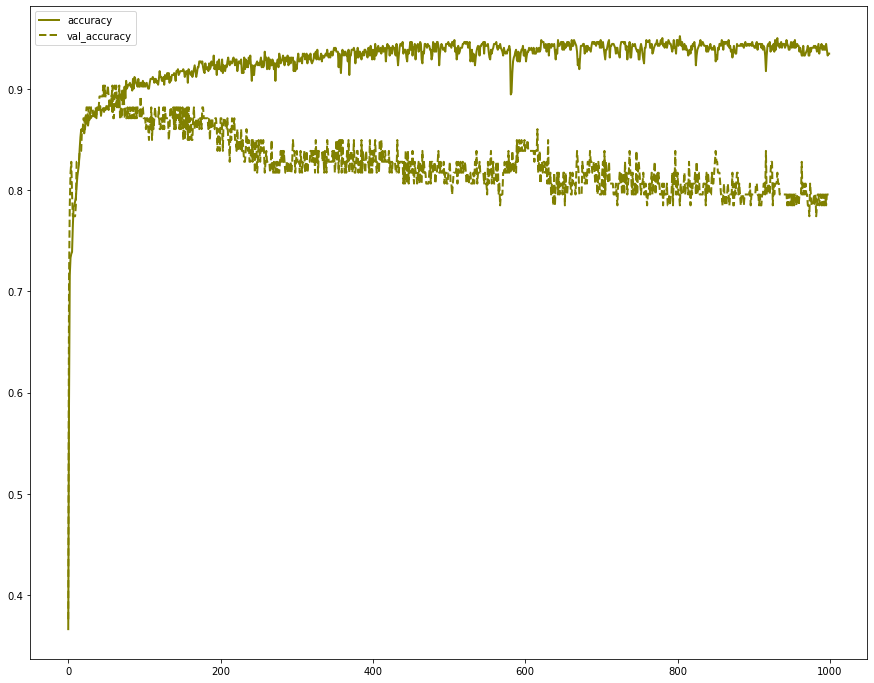

In [120]:
# multiple line plots
plt.figure(figsize= (15,12))

#plt.plot( 'epoch', 'loss', data=hist, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'epoch', 'accuracy', data=hist, marker='', color='olive', linewidth=2)
plt.plot( 'epoch', 'val_accuracy', data=hist, marker='', color='olive', linewidth=2, linestyle='dashed', label="val_accuracy")
# show legend
plt.legend()

# show graph
plt.show()

In [121]:
neural_model

In [122]:
neural_test=neural_model.predict(X_test)

In [123]:
neural_test_converted=[]
for i in neural_test:
    if i>0.5:
        neural_test_converted.append(1)
    else:
        neural_test_converted.append(0)

In [124]:
cmp_list=accuracy_score(neural_test_converted,y_test)

In [125]:
cmp_list

0.8506493506493507

In [126]:
neural_model.load_weights("Weights/Weights-137--0.88172.hdf5")

In [127]:
neural_test=neural_model.predict(X_test)

In [128]:
neural_test_converted=[]
for i in neural_test:
    if i>0.5:
        neural_test_converted.append(1)
    else:
        neural_test_converted.append(0)

In [129]:
cmp_list=accuracy_score(neural_test_converted,y_test)

In [130]:
cmp_list

0.8181818181818182

In [135]:
import pickle
# Lets dump our SVM model
pickle.dump(svm_model, open('svm_model.pkl','wb'))